<a href="https://colab.research.google.com/github/xjsh1997/STAT6289/blob/main/HW3_Jiashu_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import package
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [4]:
#load and read the data
url ='https://raw.githubusercontent.com/xjsh1997/STAT6289/main/TSLA.csv'
df=pd.read_csv(url)
print("Number of rows and columns:", df.shape)
df.head(5)

#take the Close (at the 5th column of df) as the desired output
#and extract the value in sequence according to the timestamp 
training_set = df.iloc[:800, 4:5].values
test_set = df.iloc[800:, 4:5].values

Number of rows and columns: (1259, 7)


In [5]:
# Feature Scaling for the training part(1:800) in a range of [0,1]
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
#take a look back of 60 time step and we get 740 obs from training set
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)


In [54]:
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model1.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
24/24 [==============================] - 10s 121ms/step - loss: 0.0544
Epoch 2/50
24/24 [==============================] - 3s 122ms/step - loss: 0.0142
Epoch 3/50
24/24 [==============================] - 3s 123ms/step - loss: 0.0142
Epoch 4/50
24/24 [==============================] - 3s 122ms/step - loss: 0.0117
Epoch 5/50
24/24 [==============================] - 3s 122ms/step - loss: 0.0127
Epoch 6/50
24/24 [==============================] - 3s 121ms/step - loss: 0.0142
Epoch 7/50
24/24 [==============================] - 3s 122ms/step - loss: 0.0100
Epoch 8/50
24/24 [==============================] - 3s 121ms/step - loss: 0.0107
Epoch 9/50
24/24 [==============================] - 3s 122ms/step - loss: 0.0101
Epoch 10/50
24/24 [==============================] - 3s 124ms/step - loss: 0.0091
Epoch 11/50
24/24 [==============================] - 3s 122ms/step - loss: 0.0095
Epoch 12/50
24/24 [==============================] - 3s 122ms/step - loss: 0.0096
Epoch 13/50
24/24 [=====

In [68]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 4:5]
dataset_test = df.iloc[800:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

dataset_train.head(5)

(459, 60, 1)


,Close
0,51.830002
1,52.431999
2,53.130001
3,52.627998
4,53.335999


In [65]:
###make prediction
predicted_stock_price = model1.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

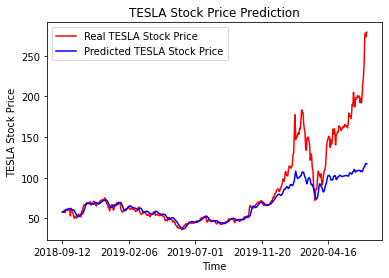

<Figure size 3600x1600 with 0 Axes>

In [66]:
#visulize the result
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.figure(figsize=(36,16), dpi=100)
plt.show()

Prediction for future using lag = 1 day


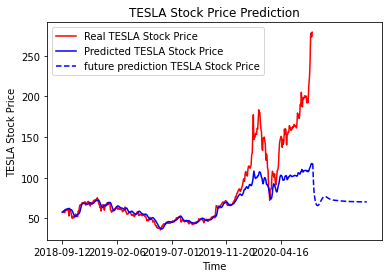

<Figure size 3600x1600 with 0 Axes>

In [101]:
future_pred = sc.transform(dataset_test.values).copy()
for i in range(100):
    future_pred = np.append(future_pred, model1.predict(future_pred[-60:].reshape(1,-1,1))[0][0])
future_pred = sc.inverse_transform(future_pred.reshape(-1,1))

#visulize

date = pd.date_range(start="2020-07-10",end="2020-10-17")
date = list(date.strftime("%Y-%m-%d"))

plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.plot(date, future_pred[459:], '--', color = 'blue', label = 'future prediction TESLA Stock Price')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.figure(figsize=(36,16), dpi=100)
plt.show()

Time lag of 7

In [71]:
### time lag of 7， we look back for 7 time stamp
# Creating a data structure with 60 time-steps and 1 output
X_train7 = []
y_train7 = []
#take a look back of 60 time step and we get 740 obs from training set
for i in range(67, 800):
    X_train7.append(training_set_scaled[i-67:i-7, 0])
    y_train7.append(training_set_scaled[i, 0])
X_train7, y_train7 = np.array(X_train7), np.array(y_train7)
X_train7 = np.reshape(X_train7, (X_train7.shape[0], X_train7.shape[1], 1))
print(X_train7.shape, y_train7.shape)


(733, 60, 1) (733,)


In [72]:
model_lag7 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_lag7.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train7.shape[1], 1)))
model_lag7.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_lag7.add(LSTM(units = 50, return_sequences = True))
model_lag7.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_lag7.add(LSTM(units = 50, return_sequences = True))
model_lag7.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_lag7.add(LSTM(units = 50))
model_lag7.add(Dropout(0.2))
# Adding the output layer
model_lag7.add(Dense(units = 1))

# Compiling the RNN
model_lag7.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model_lag7.fit(X_train7, y_train7, epochs = 20, batch_size = 32)

Epoch 1/20
23/23 [==============================] - 11s 173ms/step - loss: 0.0660
Epoch 2/20
23/23 [==============================] - 3s 119ms/step - loss: 0.0242
Epoch 3/20
23/23 [==============================] - 3s 125ms/step - loss: 0.0178
Epoch 4/20
23/23 [==============================] - 3s 151ms/step - loss: 0.0181
Epoch 5/20
23/23 [==============================] - 3s 140ms/step - loss: 0.0169
Epoch 6/20
23/23 [==============================] - 6s 240ms/step - loss: 0.0163
Epoch 7/20
23/23 [==============================] - 5s 217ms/step - loss: 0.0163
Epoch 8/20
23/23 [==============================] - 3s 124ms/step - loss: 0.0153
Epoch 9/20
23/23 [==============================] - 3s 123ms/step - loss: 0.0160
Epoch 10/20
23/23 [==============================] - 3s 123ms/step - loss: 0.0155
Epoch 11/20
23/23 [==============================] - 3s 126ms/step - loss: 0.0156
Epoch 12/20
23/23 [==============================] - 3s 123ms/step - loss: 0.0143
Epoch 13/20
23/23 [=====

In [75]:
predicted_stock_price_7 = model_lag7.predict(X_test)
predicted_stock_price_7 = sc.inverse_transform(predicted_stock_price_7)


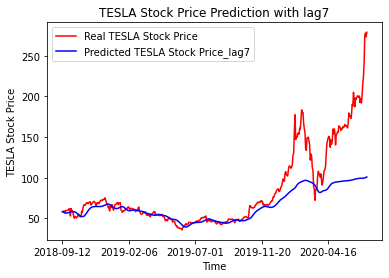

<Figure size 3600x1600 with 0 Axes>

In [90]:
#plot
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_7, color = 'blue', label = 'Predicted TESLA Stock Price_lag7')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction with lag7')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.figure(figsize=(36,16), dpi=100)
plt.show()

Time lag of 14 days

In [87]:
###time lag of 14 days trial 
#build the model3 for this time lag
X_train14 = []
y_train14 = []
#take a look back of 60 time step and we get 740 obs from training set
for i in range(74, 800):
    X_train14.append(training_set_scaled[i-74:i-14, 0])
    y_train14.append(training_set_scaled[i, 0])
X_train14, y_train14 = np.array(X_train14), np.array(y_train14)
X_train14 = np.reshape(X_train14, (X_train14.shape[0], X_train14.shape[1], 1))
print(X_train14.shape, y_train14.shape)

#build the model for lag=14 with 4 layers
model_lag14 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_lag14.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train14.shape[1], 1)))
model_lag14.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_lag14.add(LSTM(units = 50, return_sequences = True))
model_lag14.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_lag14.add(LSTM(units = 50, return_sequences = True))
model_lag14.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_lag14.add(LSTM(units = 50))
model_lag14.add(Dropout(0.2))
# Adding the output layer
model_lag14.add(Dense(units = 1))

# Compiling the RNN
model_lag14.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model_lag14.fit(X_train14, y_train14, epochs = 20, batch_size = 32)


(726, 60, 1) (726,)
Epoch 1/20
23/23 [==============================] - 9s 122ms/step - loss: 0.0601
Epoch 2/20
23/23 [==============================] - 3s 123ms/step - loss: 0.0253
Epoch 3/20
23/23 [==============================] - 3s 122ms/step - loss: 0.0203
Epoch 4/20
23/23 [==============================] - 3s 123ms/step - loss: 0.0213
Epoch 5/20
23/23 [==============================] - 3s 122ms/step - loss: 0.0183
Epoch 6/20
23/23 [==============================] - 3s 123ms/step - loss: 0.0185
Epoch 7/20
23/23 [==============================] - 3s 120ms/step - loss: 0.0194
Epoch 8/20
23/23 [==============================] - 3s 123ms/step - loss: 0.0193
Epoch 9/20
23/23 [==============================] - 3s 123ms/step - loss: 0.0183
Epoch 10/20
23/23 [==============================] - 3s 126ms/step - loss: 0.0191
Epoch 11/20
23/23 [==============================] - 3s 124ms/step - loss: 0.0181
Epoch 12/20
23/23 [==============================] - 3s 124ms/step - loss: 0.0200
Epoch

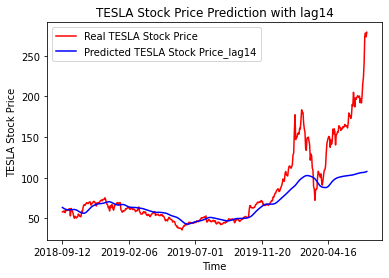

<Figure size 3600x1600 with 0 Axes>

In [89]:
#predict
predicted_stock_price_14 = model_lag14.predict(X_test)
predicted_stock_price_14 = sc.inverse_transform(predicted_stock_price_14)
#plot
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price_14, color = 'blue', label = 'Predicted TESLA Stock Price_lag14')
plt.xticks(np.arange(0,459,100))
plt.title('TESLA Stock Price Prediction with lag14')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.figure(figsize=(36,16), dpi=100)
plt.show()